### 蚂蚁金服笔试code
Yike Li
2/2019

### 1. Process Data

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import time
import sklearn
from sklearn import metrics

In [364]:
# Read data and drop the first column
data=pd.read_csv('ads_train.csv',index_col=0)
data_pred=pd.read_csv('ads_test.csv',index_col=0)
data.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
1,0,NaN,1,0.0,0.00000,0.0,0.00000,106,106,0,0,169,2130,0
2,0,NaN,1,0.0,0.00000,0.0,0.00000,6,6,0,0,150,539,0
3,0,NaN,2,0.0,0.50000,0.0,-101.14930,101,101,0,1,103,362,0
4,0,NaN,1,0.0,0.00000,0.0,0.00000,42,42,0,0,17,35,0
5,0,NaN,3,0.0,45.47917,0.0,-34.14473,64,64,0,1,100,298,0


In [365]:
data.shape

(38209, 14)

In [366]:
#check the data-missing value
data.isnull().sum()

isbuyer                    0
buy_freq               36589
visit_freq                 0
buy_interval               0
sv_interval                0
expected_time_buy          0
expected_time_visit        0
last_buy                   0
last_visit                 0
multiple_buy               0
multiple_visit             0
uniq_urls                  0
num_checkins               0
y_buy                      0
dtype: int64

In [367]:
#check the predict data-missing value
data_pred.isnull().sum()

isbuyer                    0
buy_freq               15668
visit_freq                 0
buy_interval               0
sv_interval                0
expected_time_buy          0
expected_time_visit        0
last_buy                   0
last_visit                 0
multiple_buy               0
multiple_visit             0
uniq_urls                  0
num_checkins               0
dtype: int64

In [368]:
#based on understanding of the data, the NAN value can be interpreted to 0
data['buy_freq'].fillna(value='0',inplace=True)
data_pred['buy_freq'].fillna(value='0',inplace=True)

In [369]:
#check the data again
data.isnull().sum()

isbuyer                0
buy_freq               0
visit_freq             0
buy_interval           0
sv_interval            0
expected_time_buy      0
expected_time_visit    0
last_buy               0
last_visit             0
multiple_buy           0
multiple_visit         0
uniq_urls              0
num_checkins           0
y_buy                  0
dtype: int64

In [370]:
#check the data again
data_pred.isnull().sum()

isbuyer                0
buy_freq               0
visit_freq             0
buy_interval           0
sv_interval            0
expected_time_buy      0
expected_time_visit    0
last_buy               0
last_visit             0
multiple_buy           0
multiple_visit         0
uniq_urls              0
num_checkins           0
dtype: int64

In [371]:
#check the data type
data.dtypes

isbuyer                  int64
buy_freq                object
visit_freq               int64
buy_interval           float64
sv_interval            float64
expected_time_buy      float64
expected_time_visit    float64
last_buy                 int64
last_visit               int64
multiple_buy             int64
multiple_visit           int64
uniq_urls                int64
num_checkins             int64
y_buy                    int64
dtype: object

In [372]:
#change the buy_freq type'object' to 'int'
data.buy_freq = data.buy_freq.astype(int)
data_pred.buy_freq = data_pred.buy_freq.astype(int)

In [373]:
#check the data type again
data.dtypes

isbuyer                  int64
buy_freq                 int32
visit_freq               int64
buy_interval           float64
sv_interval            float64
expected_time_buy      float64
expected_time_visit    float64
last_buy                 int64
last_visit               int64
multiple_buy             int64
multiple_visit           int64
uniq_urls                int64
num_checkins             int64
y_buy                    int64
dtype: object

In [374]:
# scale the data for further modeling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scale = scaler.fit_transform(data.iloc[:,0:13])
data_pred_scale = scaler.transform(data_pred)

In [375]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data_scale, data.y_buy, random_state=1,test_size=0.1)

In [376]:
# Show the results of the split
print('Training set has',data_train.shape[0],'samples.')
print('Testing set has',data_test.shape[0],'samples.')

Training set has 34388 samples.
Testing set has 3821 samples.


0    34234
1      154
Name: y_buy, dtype: int64

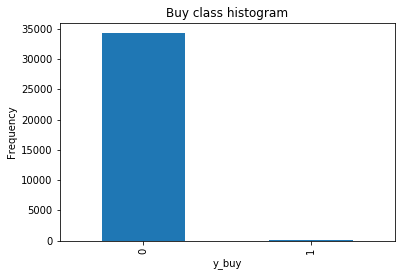

In [377]:
#check skewed classes in train set
pd.value_counts(y_train).plot.bar()
plt.title('Buy class histogram')
plt.xlabel('y_buy')
plt.ylabel('Frequency')
y_train.value_counts()

0    3803
1      18
Name: y_buy, dtype: int64

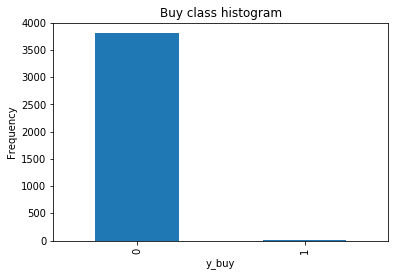

In [378]:
#check skewed classes in test set
pd.value_counts(y_test).plot.bar()
plt.title('Buy class histogram')
plt.xlabel('y_buy')
plt.ylabel('Frequency')
y_test.value_counts()

# bagging try
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.ensemble import RandomForestClassifier


rus = RandomUnderSampler(replacement=True)
n_bags = 1001
#clf = LogisticRegression(random_state=42, solver='newton-cg')
clf = RandomForestClassifier(n_estimators=200)
scaler = StandardScaler()

pred_bag = []
for i in range(n_bags):
    data_train_bag,y_train_bag = rus.fit_resample(data_train,y_train)
    
    data_scale_bag = scaler.fit_transform(data_train_bag)
    data_test_scale = scaler.transform(data_test)
    data_pred_scale = scaler.transform(data_pred)
    
    clf.fit(data_scale_bag, y_train_bag)
    pred_bag.append(clf.predict(data_test_scale))

pred_bag = np.array(pred_bag)
y_pred = []
for j in range(pred_bag.shape[1]):
    y_pred.append((Counter(pred_bag[:,j]).most_common())[0][0])
y_pred = np.array(y_pred)    
    

In [379]:
# downsampling to minimize imbalance
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(ratio={0: 20000, 1: 154},random_state=0, replacement=True)
data_res,y_res = rus.fit_sample(data_train,y_train)


In [380]:
data_res.shape

(20154, 13)

Text(0, 0.5, 'Frequency')

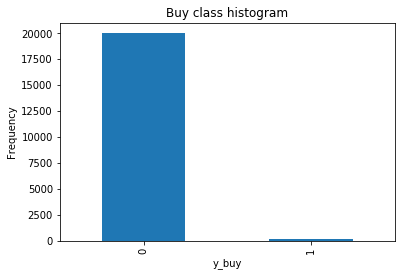

In [381]:
#check skewed classes
pd.value_counts(y_res).plot.bar()
plt.title('Buy class histogram')
plt.xlabel('y_buy')
plt.ylabel('Frequency')

In [382]:
#resample 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
data_res,y_res = sm.fit_sample(data_res,y_res)

In [383]:
data_res.shape

(40000, 13)

Text(0, 0.5, 'Frequency')

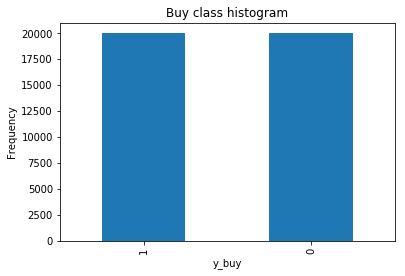

In [384]:
#check skewed classes
pd.value_counts(y_res).plot.bar()
plt.title('Buy class histogram')
plt.xlabel('y_buy')
plt.ylabel('Frequency')

# 2. Feature Selection


In [385]:
# feature selecetion 1. Recursive Feature Elimination for LR model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
LR = LogisticRegression(random_state=0, solver='newton-cg')
rfe = RFE(LR, 1)
fit = rfe.fit(data_res,y_res)
print(fit.ranking_) 

[ 6 13  2 11  7 12  8  3  1 10  5  4  9]


In [386]:
#based on two feature selection,I select 11 features as attributes
original_cols=['isbuyer','buy_freq', 'visit_freq','buy_interval','sv_interval','expected_time_buy ', 'expected_time_visit', 'last_buy','last_visit', 'multiple_buy', 'multiple_visit', 'uniq_urls','num_checkins']
feature_cols = ['isbuyer', 'visit_freq','buy_interval','sv_interval', 'expected_time_visit', 'last_buy','last_visit', 'multiple_buy', 'multiple_visit', 'uniq_urls','num_checkins']

In [387]:
#after normalization, I have to change the dataset type and get the featured data
data_res=pd.DataFrame(data_res)
data_res.columns =original_cols

data_test=pd.DataFrame(data_test)
data_test.columns =original_cols

data_pred_scale=pd.DataFrame(data_pred_scale)
data_pred_scale.columns =original_cols

X_train=data_res[feature_cols]
X_test=data_test[feature_cols]
X_pred=data_pred_scale[feature_cols]
y_train=y_res

### 3. Logistic Regrssion Model


In [388]:
# train a logistic regression model on the training set
LR= LogisticRegression(class_weight='balanced')
# fit model
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [389]:
# make class predictions for the testing set
start = time.clock()
y_pred1 = LR.predict(X_test)
end = time.clock()
t1=end - start
t1

0.018874379486078396

In [390]:
#Evaluate the LR model---score
AC1=metrics.accuracy_score(y_test,y_pred1)
PR1=metrics.precision_score(y_test,y_pred1, average='weighted')
RE1=metrics.recall_score(y_test,y_pred1,average='weighted')
F11=metrics.f1_score(y_test,y_pred1,average='binary')

print(AC1)
print(PR1)
print(RE1)
print(F11)

0.8199424234493589
0.994433435009172
0.8199424234493589
0.04178272980501393


In [391]:
#Evaluate the LR model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred1))

[[3118  685]
 [   3   15]]


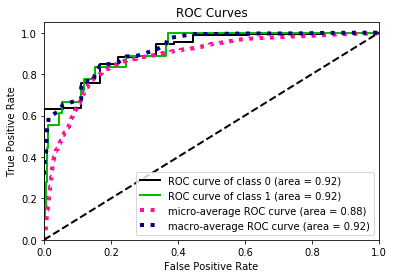

0.8266061880971164

In [392]:
# Evaluate the LR model---ROC
import scikitplot as skplt
y_probas_LR=LR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_LR)
plt.show()
roc_auc1=metrics.roc_auc_score(y_test,y_pred1)
roc_auc1

In [393]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit

In [394]:
#Model tuning for Logistic Regression

# Create the parameters list you wish to tune
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['sag','lbfgs','saga','newton-cg', 'liblinear']
param_grid = dict(C=C,solver=solver)

# Initialize the classifier
LR = LogisticRegression(random_state=42)

# Make an f1 scoring function using 'make_scorer' 
# myf1 = make_scorer(myf1, pos_label='1')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
LR_G = GridSearchCV(LR, param_grid, cv=10)
# np.array(y_train)
# TODO: Fit the grid search object to the training data and find the optimal parameters
LR_G.fit(X_train, y_train)

# Get the estimator
LR_G

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['sag', 'lbfgs', 'saga', 'newton-cg', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [395]:
# make class predictions for the testing set
start = time.clock()
y_pred2 = LR_G.predict(X_test)
end = time.clock()
t2=end - start
t2

0.010774424314149655

In [396]:
#Evaluate the LR_G model---score
AC2=metrics.accuracy_score(y_test,y_pred2)
PR2=metrics.precision_score(y_test,y_pred2, average='weighted')
RE2=metrics.recall_score(y_test,y_pred2,average='weighted')
F12=metrics.f1_score(y_test,y_pred2,average='binary')
print(AC2)
print(PR2)
print(RE2)
print(F12)

0.7914158597225857
0.9943852124467599
0.7914158597225857
0.036275695284159616


In [397]:
#Evaluate the LR_G model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred2))

[[3009  794]
 [   3   15]]


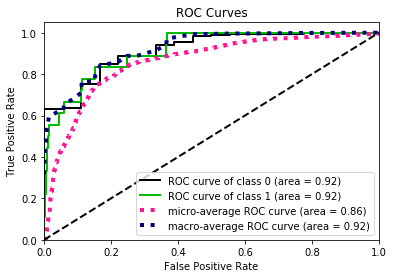

0.8122753966167061

In [398]:
# Evaluate the LR_G model---ROC
import scikitplot as skplt
y_probas_LR_G=LR_G.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_LR_G)
plt.show()
roc_auc2=metrics.roc_auc_score(y_test,y_pred2)
roc_auc2

### 4.Naive Bayes Model

In [399]:
# train a Naive Bayes Model on the training set
from sklearn.naive_bayes import GaussianNB 
NB = GaussianNB()
# fit mode
NB.fit(X_train, y_train) 

GaussianNB(priors=None)

In [400]:
# make class predictions for the testing set
start = time.clock()
y_pred3=NB.predict(X_test)
end = time.clock()
t3=end - start
t3

0.1052138891100185

In [401]:
#Evaluate the NB model---score
AC3=metrics.accuracy_score(y_test,y_pred3)
PR3=metrics.precision_score(y_test,y_pred3, average='weighted')
RE3=metrics.recall_score(y_test,y_pred3,average='weighted')
F13=metrics.f1_score(y_test,y_pred3,average='binary')
print(AC3)
print(PR3)
print(RE3)
print(F13)

0.9133734624443863
0.993742889561107
0.9133734624443863
0.06760563380281691


In [402]:
#Evaluate the NB model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred3))

[[3478  325]
 [   6   12]]


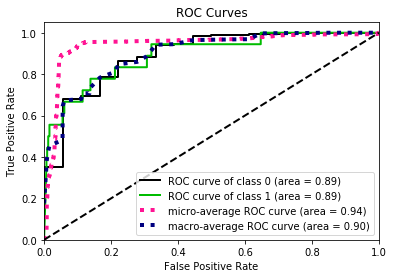

0.7906039091944955

In [403]:
# Evaluate the NB model---ROC
import scikitplot as skplt
y_probas_NB=NB.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_NB)
plt.show()
roc_auc3=metrics.roc_auc_score(y_test,y_pred3)
roc_auc3

### 5. RandomForest Model

In [404]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
# fit model
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [405]:
# make class predictions for the testing set
start = time.clock()
y_pred5 = RF.predict(X_test)
end = time.clock()
t5=end - start
t5

0.013154676169506274

In [406]:
#Evaluate the RF model---score
AC5=metrics.accuracy_score(y_test,y_pred5)
PR5=metrics.precision_score(y_test,y_pred5, average='weighted')
RE5=metrics.recall_score(y_test,y_pred5,average='weighted')
F15=metrics.f1_score(y_test,y_pred5,average='binary')
print(AC5)
print(PR5)
print(RE5)
print(F15)

0.976707668149699
0.9908393375975911
0.976707668149699
0.02197802197802198


In [407]:
#Evaluate the RF model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred5))

[[3731   72]
 [  17    1]]


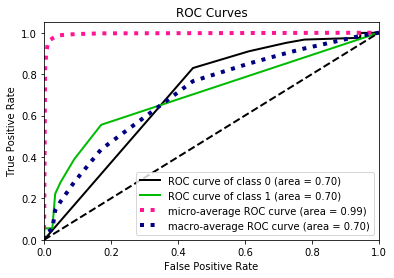

0.5183115668916353

In [408]:
# Evaluate the RF model---ROC
import scikitplot as skplt
y_probas_RF=RF.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_RF)
plt.show()
roc_auc5=metrics.roc_auc_score(y_test,y_pred5)
roc_auc5

In [409]:
#Model tuning for RandomForest Model 

# Create the parameters list you wish to tune
n_estimators = [10, 15, 20, 50, 100, 150]
criterion = ["gini","entropy"] 
min_samples_leaf = [2, 4, 6]
param_grid = dict(n_estimators=n_estimators,criterion=criterion,min_samples_leaf=min_samples_leaf)

# TODO: Perform grid search on the classifier 
RF_G = GridSearchCV(RF,param_grid=param_grid,cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
RF_G.fit(X_train, y_train)

# Get the estimator
RF_G=RF_G.best_estimator_

In [410]:
RF_G

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [411]:
# make class predictions for the testing set
start = time.clock()
y_pred6 = RF_G.predict(X_test)
end = time.clock()
t6=end - start
t6

0.12839718304167036

In [412]:
#Evaluate the RF_G model---score
AC6=metrics.accuracy_score(y_test,y_pred6)
PR6=metrics.precision_score(y_test,y_pred6, average='weighted')
RE6=metrics.recall_score(y_test,y_pred6,average='weighted')
F16=metrics.f1_score(y_test,y_pred6,average='binary')
print(AC6)
print(PR6)
print(RE6)
print(F16)

0.9774928029311698
0.9914958258011658
0.9774928029311698
0.06521739130434784


In [221]:
#Evaluate the RF_G model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred6))

[[3733   70]
 [  16    2]]


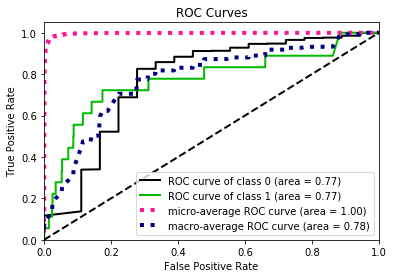

0.5463522949718059

In [222]:
# Evaluate the RF_G model---ROC
import scikitplot as skplt
y_probas_RF_G=RF_G.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_RF_G)
plt.show()
roc_auc6=metrics.roc_auc_score(y_test,y_pred6)
roc_auc6

### 6. Decision Tree Model

In [223]:
# train a Decision Tree Model on the training set
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
# fit model
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [224]:
# make class predictions for the testing set
start = time.clock()
y_pred7 = DT.predict(X_test)
end = time.clock()
t7=end - start
t7

0.0012286136552575044

In [225]:
#Evaluate the DT model---score
AC7=metrics.accuracy_score(y_test,y_pred7)
PR7=metrics.precision_score(y_test,y_pred7, average='weighted')
RE7=metrics.recall_score(y_test,y_pred7,average='weighted')
F17=metrics.f1_score(y_test,y_pred7,average='binary')
print(AC7)
print(PR7)
print(RE7)
print(F17)

0.9678094739596964
0.9910855885501303
0.9678094739596964
0.03149606299212599


In [226]:
#Evaluate the DT model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred7))

[[3696  107]
 [  16    2]]


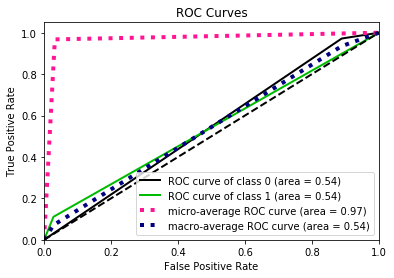

0.5414877143775382

In [227]:
# Evaluate the DT model---ROC
import scikitplot as skplt
y_probas_DT=DT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_DT)
plt.show()
roc_auc7=metrics.roc_auc_score(y_test,y_pred7)
roc_auc7

In [228]:
#Model tuning for Decision Tree Model

# Create the parameters list you wish to tune
sample_split_range = list(range(2, 50,1))
max_depth=list(range(1,20,2))

param_grid = dict(min_samples_split=sample_split_range,max_depth=max_depth)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
DT_G = GridSearchCV(DT, param_grid, cv=10,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
DT_G.fit(X_train, y_train)

# Get the estimator
DT_G


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [230]:
DT_G

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [231]:
# make class predictions for the testing set
start = time.clock()
y_pred8 = DT_G.predict(X_test)
end = time.clock()
t8=end - start
t8

0.0011114399203506764

In [232]:
#Evaluate the DT_G model---score
AC8=metrics.accuracy_score(y_test,y_pred8)
PR8=metrics.precision_score(y_test,y_pred8, average='weighted')
RE8=metrics.recall_score(y_test,y_pred8,average='weighted')
F18=metrics.f1_score(y_test,y_pred8,average='binary')
print(AC8)
print(PR8)
print(RE8)
print(F18)

0.960743260926459
0.9910369951657196
0.960743260926459
0.025974025974025972


In [233]:
#Evaluate the DT_G model---confusion matrix
print(metrics.confusion_matrix(y_test, y_pred8))

[[3669  134]
 [  16    2]]


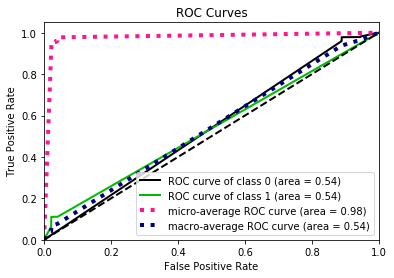

0.5379378852952348

In [234]:
# Evaluate the DT_G model---ROC
y_probas_DT_G=DT_G.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas_DT_G)
plt.show()
roc_auc8=metrics.roc_auc_score(y_test,y_pred8)
roc_auc8

### 7. Compare seven models

In [235]:
model_name=['LR','LR_G','NB','RF','RF_G','DT','DT_G']
model_time=[t1,t2,t3,t5,t6,t7,t8]
model_ac=[AC1,AC2,AC3,AC5,AC6,AC7,AC8]
model_f1=[F11,F12,F13,F15,F16,F17,F18]
model_roc_auc=[roc_auc1,roc_auc2,roc_auc3,roc_auc5,roc_auc6,roc_auc7,roc_auc8]

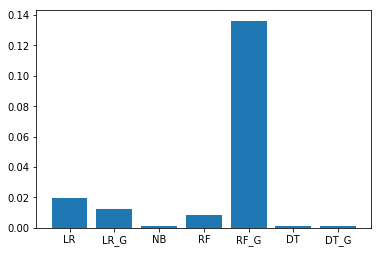

In [237]:
#compare computing time

plt.bar(range(len(model_time)),model_time,tick_label=model_name)

plt.show()

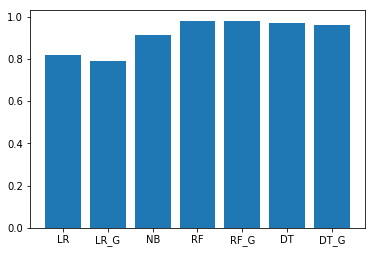

In [238]:
#compare accuracy

plt.bar(range(0,len(model_ac)),model_ac,tick_label=model_name)

plt.show()

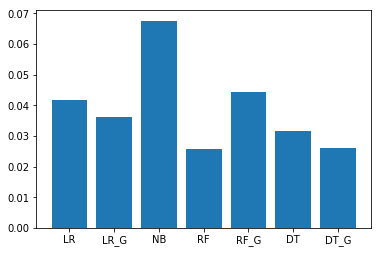

In [239]:
#compare computing time

plt.bar(range(len(model_f1)),model_f1,tick_label=model_name)

plt.show()

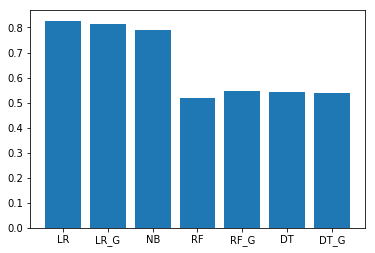

In [240]:
#compare roc_auc score

plt.bar(range(len(model_roc_auc)),model_roc_auc,tick_label=model_name)

plt.show()

### 8. Predict Data

In [354]:
# predict ads_test.csv data
y_pred=LR.predict(X_pred)
y_pred_prob=LR.predict_proba(X_pred)
y_pred_prob

array([[0.88049602, 0.11950398],
       [0.48442625, 0.51557375],
       [0.69533172, 0.30466828],
       ...,
       [0.18200014, 0.81799986],
       [0.93053925, 0.06946075],
       [0.83787236, 0.16212764]])

In [355]:
# process some type and index problems
y_pred_prob=pd.DataFrame(y_pred_prob)
y_pred_prob.index+= 1 
y_pred_prob

,0,1
1,0.880496,0.119504
2,0.484426,0.515574
3,0.695332,0.304668
4,0.909616,0.090384
5,0.926176,0.073824
6,0.564040,0.435960
7,0.806455,0.193545
8,0.720047,0.279953
9,0.884344,0.115656
10,0.657057,0.342943


In [356]:
# add class and probability columns to original dataset
data_pred['y_buy_prob']=y_pred_prob.max(axis=1)
data_pred['y_buy']=y_pred

In [357]:
#check the result
data_pred

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy,y_buy_prob
1,0,0,1,0.0,0.000000,0.0,0.000000,72,72,0,0,154,1100,0,0.880496
2,0,0,1,0.0,0.000000,0.0,0.000000,5,5,0,0,4,12,1,0.515574
3,0,0,1,0.0,0.000000,0.0,0.000000,42,42,0,0,42,110,0,0.695332
4,0,0,2,0.0,29.791670,0.0,-106.188300,121,121,0,1,101,401,0,0.909616
5,0,0,2,0.0,21.333330,0.0,-108.323000,118,118,0,1,163,891,0,0.926176
6,0,0,1,0.0,0.000000,0.0,0.000000,19,19,0,0,16,48,0,0.564040
7,0,0,1,0.0,0.000000,0.0,0.000000,81,81,0,0,32,177,0,0.806455
8,0,0,1,0.0,0.000000,0.0,0.000000,36,36,0,0,76,163,0,0.720047
9,0,0,1,0.0,0.000000,0.0,0.000000,70,70,0,0,168,1317,0,0.884344
10,0,0,2,0.0,133.125000,0.0,50.474090,16,16,0,1,67,396,0,0.657057


In [361]:
#save the result to csv
data_pred.to_csv('data_pred.csv')